<a href="https://colab.research.google.com/github/annwanginnt/Aritificial_intelligence/blob/main/asssignment3_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow-datasets

In [20]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


## Data Preprocessing

In [42]:
# load data
(raw_train, raw_test), metadata = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    with_info=True,
    as_supervised=True,
)

# split data
num_train_examples = len(raw_train)
num_validation_examples = int(num_train_examples * 0.2)

raw_validation = raw_train.take(num_validation_examples)
raw_train = raw_train.skip(num_validation_examples)

# Preprocessing: resizing and normalizing data
def format_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = preprocess_input(image)# /255
    return image, label

# Apply the prepocessing
batch_size = 32
train_batches = raw_train.map(format_image).shuffle(1000).batch(batch_size).prefetch(1)
validation_batches = raw_validation.map(format_image).batch(batch_size).prefetch(1)
test_batches = raw_test.map(format_image).batch(batch_size).prefetch(1)


##  Try custom_model

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [45]:
# Build model
custom_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(metadata.features['label'].num_classes, activation='softmax')
])


In [46]:
#compile model
custom_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [47]:
# callbacks implementatin
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


In [50]:
# train model
epochs = 30
custom_history = custom_model.fit(train_batches,
                    epochs=epochs,
                    validation_data=validation_batches,
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/30
300/300 [==============================] - 59s 158ms/step - loss: 5.2766 - accuracy: 0.0064 - val_loss: 4.7892 - val_accuracy: 0.0054
Epoch 2/30
300/300 [==============================] - 49s 149ms/step - loss: 4.7880 - accuracy: 0.0061 - val_loss: 4.7906 - val_accuracy: 0.0054
Epoch 3/30
300/300 [==============================] - 54s 157ms/step - loss: 4.7878 - accuracy: 0.0077 - val_loss: 4.7919 - val_accuracy: 0.0046
Epoch 4/30
300/300 [==============================] - 47s 142ms/step - loss: 4.7877 - accuracy: 0.0074 - val_loss: 4.7928 - val_accuracy: 0.0046
Epoch 5/30
300/300 [==============================] - 52s 150ms/step - loss: 4.7876 - accuracy: 0.0078 - val_loss: 4.7937 - val_accuracy: 0.0046
Epoch 6/30
300/300 [==============================] - 48s 140ms/step - loss: 4.7875 - accuracy: 0.0085 - val_loss: 4.7943 - val_accuracy: 0.0046
Epoch 7/30
300/300 [==============================] - 49s 143ms/step - loss: 4.7876 - accuracy: 0.0089 - val_loss: 4.7949 - val_ac

In [51]:
# evaluating model
test_loss, test_accuracy = custom_model.evaluate(test_batches)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


269/269 [==============================] - 31s 115ms/step - loss: 4.7873 - accuracy: 0.0092
Test accuracy: 0.92%


## Try Alexnet model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
# 加载数据集
(raw_train, raw_test), metadata = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    with_info=True,
    as_supervised=True,
)

# 分割数据集
num_train_examples = len(raw_train)
num_validation_examples = int(num_train_examples * 0.2)

raw_validation = raw_train.take(num_validation_examples)
raw_train = raw_train.skip(num_validation_examples)

# 图像预处理函数
def format_image(image, label):
    image = tf.image.resize(image, (227, 227))  # 调整图像大小为227x227
    image = image / 255.0  # 归一化像素值
    return image, label

# 应用预处理
batch_size = 32
train_batches = raw_train.map(format_image).shuffle(1000).batch(batch_size)
validation_batches = raw_validation.map(format_image).batch(batch_size)
test_batches = raw_test.map(format_image).batch(batch_size)


In [ ]:
model = Sequential([
    Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(metadata.features['label'].num_classes, activation='softmax')  # 根据类别数调整
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
epochs = 10
history = model.fit(train_batches,
                    epochs=epochs,
                    validation_data=validation_batches)


In [ ]:
test_loss, test_accuracy = model.evaluate(test_batches)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


##   Try ResNet50 model

In [41]:
# Apply the prepocessing
batch_size = 32
train_batches = raw_train.map(format_image).shuffle(1000).batch(batch_size).prefetch(1)
validation_batches = raw_validation.map(format_image).batch(batch_size).prefetch(1)
test_batches = raw_test.map(format_image).batch(batch_size).prefetch(1)

In [27]:
# 基础模型 - ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 添加自定义层
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(metadata.features['label'].num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 冻结ResNet的卷积层
for layer in base_model.layers:
    layer.trainable = False

# 编译模型
model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [28]:
# 训练模型
epochs = 10
history = model.fit(
    train_batches,
    epochs=epochs,
    validation_data=validation_batches
)


Epoch 1/10
300/300 [==============================] - 73s 208ms/step - loss: 1.5448 - accuracy: 0.5893 - val_loss: 1.1073 - val_accuracy: 0.6787
Epoch 2/10
300/300 [==============================] - 61s 187ms/step - loss: 0.5897 - accuracy: 0.8142 - val_loss: 0.9178 - val_accuracy: 0.7196
Epoch 3/10
300/300 [==============================] - 54s 165ms/step - loss: 0.3412 - accuracy: 0.8885 - val_loss: 0.9789 - val_accuracy: 0.7317
Epoch 4/10
300/300 [==============================] - 55s 169ms/step - loss: 0.2155 - accuracy: 0.9297 - val_loss: 1.0006 - val_accuracy: 0.7379
Epoch 5/10
300/300 [==============================] - 53s 161ms/step - loss: 0.1497 - accuracy: 0.9532 - val_loss: 1.1451 - val_accuracy: 0.7183
Epoch 6/10
300/300 [==============================] - 56s 171ms/step - loss: 0.1475 - accuracy: 0.9523 - val_loss: 1.1322 - val_accuracy: 0.7242
Epoch 7/10
300/300 [==============================] - 55s 166ms/step - loss: 0.1038 - accuracy: 0.9658 - val_loss: 1.2804 - val_ac

In [29]:
# 评估模型性能
test_loss, test_accuracy = model.evaluate(test_batches)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


269/269 [==============================] - 37s 137ms/step - loss: 1.3581 - accuracy: 0.7252
Test accuracy: 72.52%


Accuracy:

The model correctly predicted around 72.52% of the test images. In other words, when presented with a new, unseen image of a dog, it has about a 72.52% chance of correctly identifying the breed of the dog.
In image classification tasks, accuracy is a common metric to measure the performance of a model, especially in cases where the classes are balanced.

Loss:

The average loss of the model on the test set is 1.3581. The loss function measures the degree of error in the model's predictions. In this case, it likely refers to the cross-entropy loss, which is common in classification tasks.
The lower the loss, the closer the model's predictions are to the actual labels, indicating better performance.
Performance

Evaluation:

An accuracy of 72.52% is relatively good for a complex task like the Stanford Dogs dataset, which involves a large dataset with 120 different breeds of dogs, especially if extensive hyperparameter tuning or advanced techniques have not been applied.
However, this accuracy also indicates that there is room for improvement. Considerations for further improvement could include adjusting the model architecture, enhancing data augmentation, using more complex models, or tweaking the training process (such as longer training duration, different learning rate schedules, etc.).


Number of Steps:

The output "269/269" indicates that the test data was evaluated in 269 batches, which depends on the size of the test set and the batch size. Each batch contains a certain number of test images.

## Run  model on the test set and collect both the predictions and the true labels.

In [30]:
import numpy as np

# Collect all predictions and labels
all_predictions = []
all_labels = []

for images, labels in test_batches:
    preds = model.predict(images)
    all_predictions.extend(np.argmax(preds, axis=1))
    all_labels.extend(labels.numpy())

all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)


1/1 [==============================] - 1s 890ms/step


## 2. Map Labels to Breed Names
You need a mapping from the numeric labels to the actual breed names. This can usually be obtained from the dataset metadata.

In [31]:
# Assuming 'metadata' is the variable holding the dataset metadata
label_names = metadata.features['label'].int2str

# Map labels to names
all_label_names = [label_names(label) for label in all_labels]
all_pred_names = [label_names(pred) for pred in all_predictions]


## Calculate Accuracy for Each Breed
Now, calculate the accuracy for each breed by comparing the predictions with the true labels

In [32]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Calculate accuracy per breed
breed_accuracies = {}
for breed in set(all_label_names):
    indices = [i for i, label in enumerate(all_label_names) if label == breed]
    breed_labels = [all_labels[i] for i in indices]
    breed_preds = [all_predictions[i] for i in indices]
    breed_accuracies[breed] = accuracy_score(breed_labels, breed_preds)

# Convert to DataFrame for better visualization
breed_accuracies_df = pd.DataFrame(breed_accuracies.items(), columns=['Breed', 'Accuracy'])


## Display or Analyze the Results
Finally, you can display the results in a sorted order to analyze which breeds the model predicts well and which ones it does not.

In [33]:
# Sort by accuracy
sorted_breed_accuracies = breed_accuracies_df.sort_values('Accuracy', ascending=False)

# Display the results
print(sorted_breed_accuracies)


                              Breed  Accuracy
6        n02086646-blenheim_spaniel  0.965909
109              n02112350-keeshond  0.965517
63                n02111889-samoyed  0.957627
98          n02109525-saint_bernard  0.957143
20       n02095889-sealyham_terrier  0.950980
..                              ...       ...
18    n02087394-rhodesian_ridgeback  0.375000
2          n02110185-siberian_husky  0.347826
86        n02113799-standard_poodle  0.288136
7    n02106382-bouvier_des_flandres  0.260000
113         n02106166-border_collie  0.240000

[120 rows x 2 columns]


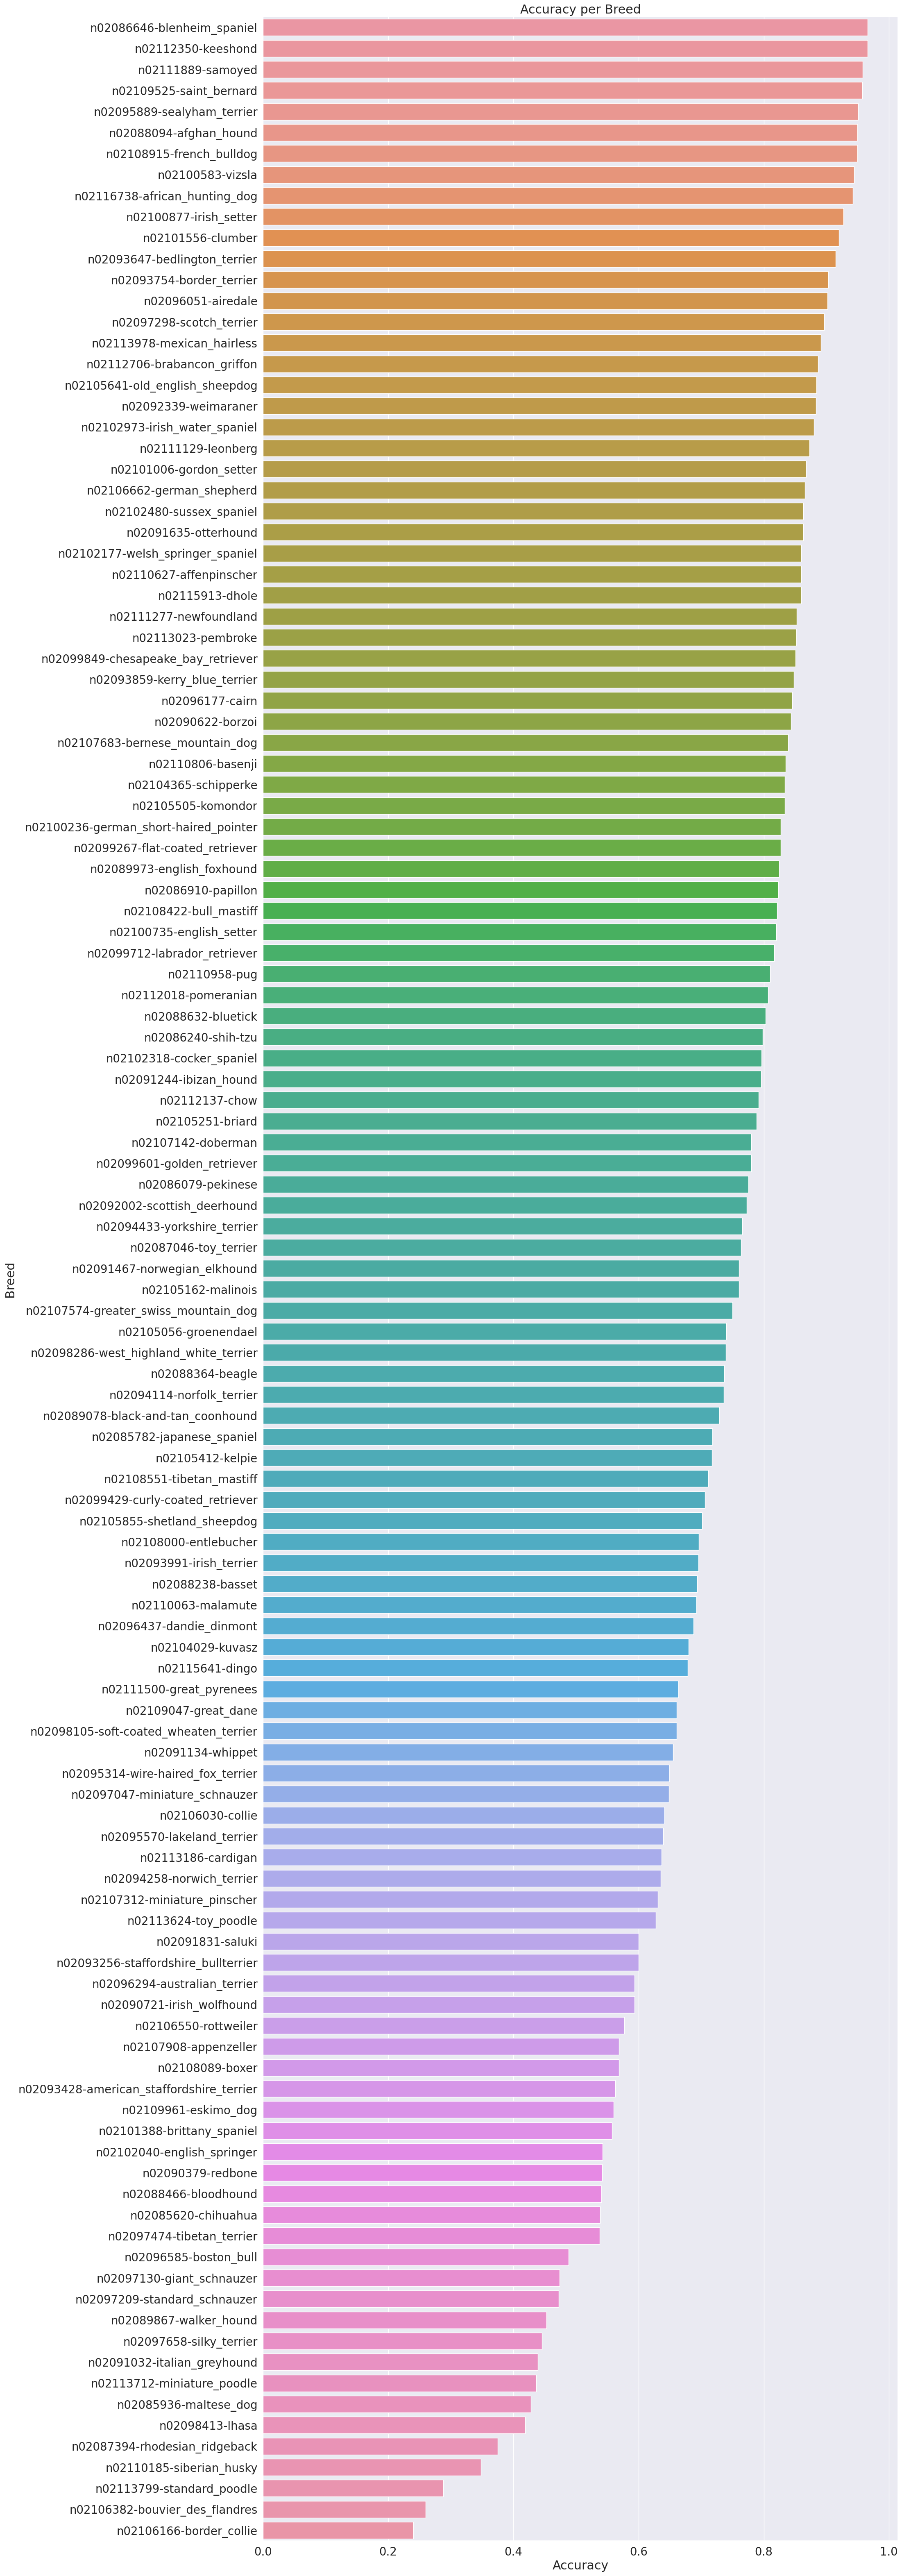

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by accuracy
sorted_breed_accuracies = breed_accuracies_df.sort_values('Accuracy', ascending=False)
sns.set(font_scale=1.8)
# Plotting
plt.figure(figsize=(20, 80))
sns.barplot(x="Accuracy", y="Breed", data=sorted_breed_accuracies)
plt.title('Accuracy per Breed')
plt.xlabel('Accuracy')
plt.ylabel('Breed')
plt.show()


## Challenges

1. At the begining, after I  normalized and resized imaged, I  tried custom_model, alexnet model, and vgg model, the accuracy are all very low (around 7% only).  could not figure out why, then I did some self study, found Resnet is a powerful model for image classification, it has built-in functions and tested on tons of images already and have 50 layers, using residual connection, I tried ResNet model, the accuracy is high and it has special way to preprocess the data which is shuffle function, then I realized the previouse models did not well might because the limited image for each bread.  

Then I used the same way to preprocesse data and tried custom_model, alexnet, and vgg models, they still didnot perform well.
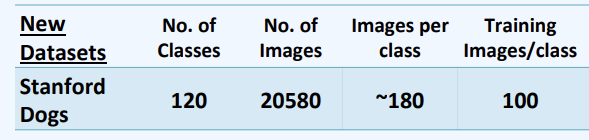
I used the same way
2. Another challenge is the approach to load data.  in class we used 28x28 to reshape the image, however, that are for simple letter identification. for more complex images, at least use 244x244 pixels.
3. One challenge I was facing is how to split the data, by checked the dataset info and the dataset documentation, this dataset has already identifed train , test image and labels. so I just need to define them .



##  Insights on what worked well and what didn’t.

custome_model, alexnet model, vgg and inception do not work well, with only around 7% acuuracy rate.